In [2]:
from ipywidgets import interact
from MPC2_phy_proj import *

import plotly.graph_objects as go
from plotly.subplots import make_subplots

test_env()

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.86381711e-11  0.00000000e+00  7.57322474e-11]
 [ 5.86381711e-11  0.00000000e+00 -7.57322474e-11]] [-0.6569052996153647, 0.32845264980768235, 0.32845264980768235]
Typical value is -8.66e-19 or -8.754e-19 J.
Total E= -8.753229796504332e-19


In [14]:
def total_dist(ri):
    '''
    calculate the total distance between each pair of atoms
    '''
    tot_value=0 #initialise the total potential energy
    chargeadded=[] #list of indices of charges already added
    for loop in range(len(ri)): #loop over each charge in turn
        #....incomplete code below which you can use as a starting point
        for j in chargeadded: #loop over charges already added (bringing charge loop towards charge j)            
            tot_value_ij=dist(ri[j],ri[loop])
            #print('Adding PE %.2e [units] of bringing charge %d towards charge %d' % (Uij,loop,j))
            tot_value=tot_value+tot_value_ij
        chargeadded.append(loop) #add the index of the added charge to the list
    return tot_value 


def constrain01(xyz_coord,threshold):
    chargeadded=[] #list of indices of charges already added
    bolean_list = []
    for loop in range(len(xyz_coord)): #loop over each charge in turn
        for j in chargeadded: #loop over charges already added (bringing charge loop towards charge j)            
            tot_value_ij=dist(xyz_coord[j],xyz_coord[loop])
            if tot_value_ij>threshold:
                bolean_list.append(True)
            else:
                bolean_list.append(False)
        chargeadded.append(loop)
    
    for k in bolean_list:
        if k!=True:
            return False
    return True


def constrain02(xyz_coord,threshold,threshold2=1):
    bolean_list = []
    for i in range(len(xyz_coord)): #loop over each charge in turn
        tot_value_ij=dist(xyz_coord[i],np.array([0.5,0.5,0.5]))
        if tot_value_ij>threshold and tot_value_ij<threshold2:
            bolean_list.append(True)
        else:
            bolean_list.append(False)
    for k in bolean_list:
        if k!=True:
            return False
    return True


def withinrange(num,threshold):
    if abs(num-1.5146449e-10)<threshold:
        return True
    else:
        return False
        



def constrain03(xyz_coord,threshold):
    chargeadded=[] #list of indices of charges already added
    bolean_list = []
    for loop in range(len(xyz_coord)): #loop over each charge in turn
        for j in chargeadded: #loop over charges already added (bringing charge loop towards charge j)            
            tot_value_ij=dist(xyz_coord[j],xyz_coord[loop])
            if tot_value_ij>threshold:
                bolean_list.append(True)
            elif withinrange(tot_value_ij,4.8e-18):
                bolean_list.append(True)
            else:
                bolean_list.append(False)
        chargeadded.append(loop)
    
    for k in bolean_list:
        if k!=True:
            return False
    return True

In [39]:
def potl_energy_sum_electrode(ri,qi,extra_E_vector=np.array([0,0,0])):
    U=0 #initialise the total potential energy
    chargeadded=[] #list of indices of charges already added
    for loop in range(len(qi)): #loop over each charge in turn
        #....incomplete code below which you can use as a starting point
        for j in chargeadded: #loop over charges already added (bringing charge loop towards charge j)            
            Uij=e*qi[j] *np.dot((Efield(ri[j],ri[loop],qi[loop])+extra_E_vector),(dist(ri[j],ri[loop])*unit_v(ri[j],ri[loop])))
            #print('Adding PE %.2e [units] of bringing charge %d towards charge %d' % (Uij,loop,j))
            U=U+Uij
        chargeadded.append(loop) #add the index of the added charge to the list
    #print('Total PE is %.2e [units]' % U)
    return U #return the total potential energy

In [5]:
r_test = np.array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
 [ 5.86381711e-11 , 0.00000000e+00,  7.57322474e-11],
 [ 5.86381711e-11,  0.00000000e+00, -7.57322474e-11]])
q_test = np.array([-0.6569052996153647, 0.32845264980768235, 0.32845264980768235])

In [6]:
potl_energy_sum(r_test,q_test)

-8.75322979356865e-19

In [12]:
potl_energy_sum_electrode(r_test,q_test)

-8.75322979356865e-19

In [13]:
8e9 / e

4.993757802746567e+28

# 3 Here

In [49]:
test = []
test + [1,2]


[1, 2]

In [67]:
# test and extract the lowest one

ditance_bw_all = []
total_E_all = []

datasets = []

extra_e_v = np.array([8e9,0,0])
#-------IMPORTANT-------BELOW-------O_O_mini_dist-------
O_O_mini_dist = 0.28 #unit in nm. 0.25
#Na_O_mini_dist = 0.18 #unit in nm.0.19
#Na_O_max_dist = 0.33 #unit in nm.0.19

H_H_mini_dist = 1.3e-10 #unit in m. 1.3e-10

lowest_db = []
lowest_total_dist = []
lowest_totalE = []

lowest_theta = []
lowest_phi = []
for kk in range(50):
    ditance_bw_all = []
    total_E_all = []
    datasets = []
    #-------IMPORTANT-------BELOW-------range(1000)-------
    for i in range(25):
        while True: # test the genrated coord. set, if dist bw O-O < O_O_mini_dist, regenate the coord. sets
            #inside the loop, generate another set
            xa=np.random.rand(6)
            ya=np.random.rand(6)
            za=np.random.rand(6)
            thetar=np.random.rand(6)*np.pi*2 
            phir=np.random.rand(6)*np.pi*2 
            moltypes =[1,1,1,1,1,1]

            xyza = np.stack((np.array(xa), np.array(ya),np.array(za)), axis=-1)

            
            #calculate the total E for this generated sys.
            rall,qall = allatomposns(moltypes,xa,ya,za,phir,thetar)
            rall = np.array(rall)*1e-9
            potl_E_sum = potl_energy_sum_electrode(rall,qall,extra_e_v)
            #print(potl_E_sum)
            rall_HA = rall[1::3]
            rall_HB = rall[2::3]
            rall_Hs = np.concatenate((rall_HA,rall_HB),axis=0)

            #if constrain01(xyza_5,O_O_mini_dist) and constrain02(xyza_5,Na_O_mini_dist,Na_O_max_dist) and constrain03(rall_Hs,H_H_mini_dist):
            #if constrain01(xyza_5,O_O_mini_dist) and constrain02(xyza_5,Na_O_mini_dist) \
             #                                    and potl_E_sum < -8.2e-19 \
             #                                    and constrain03(rall_Hs,H_H_mini_dist):
            if potl_E_sum < -6.7e-18 and constrain01(xyza,O_O_mini_dist):

                break
            else:
                continue

        # then, use this generated coord, save the data


        datasets.append([moltypes,xa,ya,za,phir,thetar])# all the succeed coord. set is saved here
        #calculate the total distance
        ditance_bw_all.append(total_dist(rall))
        #calculate the total E_energy
        total_E_all.append(potl_E_sum)# all the total E_energy of the succeed coord. set are saved here
    #------the coord. set finishing generating------

    #for all the successfully generated coord. sets, find the lowest one
    total_E_all = np.array(total_E_all)
    datasets = np.array(datasets)
    lowest_index = np.argmin(total_E_all)
    

    
    #For this lowest one
    lowest_db.append([datasets[lowest_index][0],datasets[lowest_index][1],datasets[lowest_index][2],\
                         datasets[lowest_index][3],datasets[lowest_index][4],datasets[lowest_index][5]])
    # calculate the lowest energy 
    rall,qall = allatomposns(datasets[lowest_index][0],datasets[lowest_index][1],datasets[lowest_index][2],\
                             datasets[lowest_index][3],datasets[lowest_index][4],datasets[lowest_index][5])
    rall = np.array(rall)*1e-9
    potl_E_sum = potl_energy_sum_electrode(rall,qall,extra_e_v)
    
    print('The lowest E_energy - potl_E_sum:',potl_E_sum, 'J')
    lowest_totalE.append(potl_E_sum)
    lowest_total_dist.append(total_dist(rall))

    
    lowest_theta = np.concatenate((datasets[lowest_index][5], lowest_theta))
    lowest_phi = np.concatenate((datasets[lowest_index][4], lowest_phi))

#-------plot------Total E against total distance-------
#plot all the possible coord.
plt.figure(figsize=(8,5.5)) 
plt.title('total E against total distance between all pairs',fontsize=14)
plt.plot(lowest_total_dist, lowest_totalE, marker='.',linestyle = '')

plt.xlabel('total distance(nm)')
plt.ylabel('total E (J)')
plt.show();

The lowest E_energy - potl_E_sum: -7.143693425214403e-18 J
The lowest E_energy - potl_E_sum: -7.260035511914624e-18 J
The lowest E_energy - potl_E_sum: -7.218162913855956e-18 J
The lowest E_energy - potl_E_sum: -7.470380152889082e-18 J
The lowest E_energy - potl_E_sum: -7.386641983177541e-18 J
The lowest E_energy - potl_E_sum: -7.13184722543304e-18 J
The lowest E_energy - potl_E_sum: -7.419122648004893e-18 J
The lowest E_energy - potl_E_sum: -7.448952614051757e-18 J
The lowest E_energy - potl_E_sum: -7.128239359440442e-18 J
The lowest E_energy - potl_E_sum: -7.443129619521388e-18 J
The lowest E_energy - potl_E_sum: -7.3233461415924e-18 J
The lowest E_energy - potl_E_sum: -7.652264604551833e-18 J
The lowest E_energy - potl_E_sum: -7.415518482894015e-18 J
The lowest E_energy - potl_E_sum: -7.482845685508654e-18 J
The lowest E_energy - potl_E_sum: -7.449237903151974e-18 J
The lowest E_energy - potl_E_sum: -7.065706961887668e-18 J
The lowest E_energy - potl_E_sum: -7.167486907943992e-18 J


KeyboardInterrupt: 

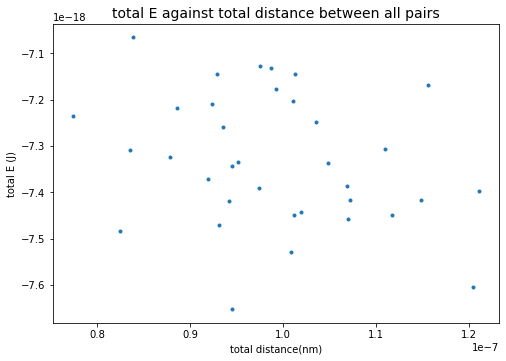

In [68]:
plt.figure(figsize=(8,5.5)) 
plt.title('total E against total distance between all pairs',fontsize=14)
plt.plot(lowest_total_dist, lowest_totalE, marker='.',linestyle = '')

plt.xlabel('total distance(nm)')
plt.ylabel('total E (J)')
plt.show();

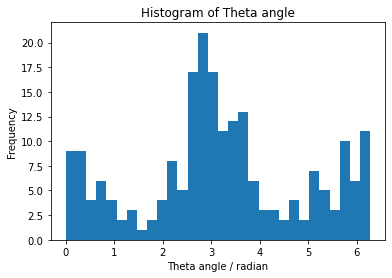

In [69]:
plt.title('Histogram of Theta angle')
plt.hist(lowest_theta, bins=30)
plt.xlabel('Theta angle / radian')
plt.ylabel('Frequency')
plt.show()



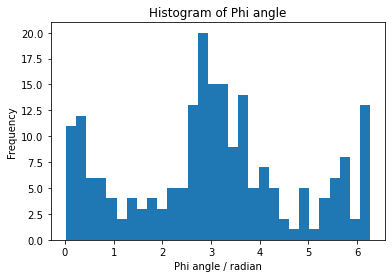

In [71]:
plt.title('Histogram of Phi angle')
plt.hist(lowest_phi, bins=30)
plt.xlabel('Phi angle / radian')
plt.ylabel('Frequency')
plt.show()

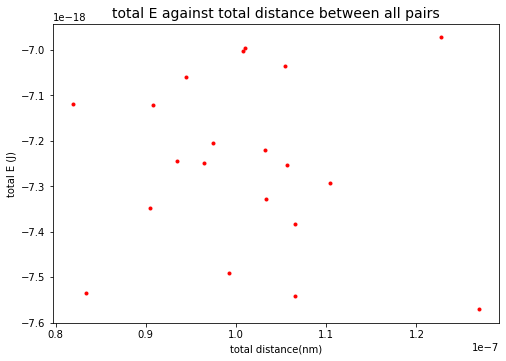

In [44]:
plt.figure(figsize=(8,5.5)) 
plt.title('total E against total distance between all pairs',fontsize=14)
plt.plot(lowest_total_dist, lowest_totalE, marker='.',linestyle = '',color='r')

plt.xlabel('total distance(nm)')
plt.ylabel('total E (J)')
plt.show();

In [38]:
# plot all the graphy for the sys with E lower than -8E-18 j
for lowest_index in range(len(lowest_db[:])):
    this_rall = []
    this_qall = []
    
    rall,qall = allatomposns(lowest_db[lowest_index][0],lowest_db[lowest_index][1],lowest_db[lowest_index][2],\
                         lowest_db[lowest_index][3],lowest_db[lowest_index][4],lowest_db[lowest_index][5])
    rall = np.array(rall)*1e-9
    potl_E_sum = potl_energy_sum_electrode(rall,qall,extra_e_v)
    print('This E_energy - potl_E_sum:',potl_E_sum, 'J')

    
    
    this_e = "{:.3g}".format(potl_energy_sum_electrode(rall,qall,extra_e_v))
    print('potl_E_sum:',this_e, 'J')
    
    
    xall=[]
    yall=[]
    zall=[]
    for i in range(int(len(rall))):
        xall.append(float(rall[i][0])*1e9)
        yall.append(float(rall[i][1])*1e9)
        zall.append(float(rall[i][2])*1e9)
    #print('xall:',xall)
    this_e = "{:.3g}".format(potl_energy_sum_electrode(rall,qall,extra_e_v))
    print('potl_E_sum:',this_e, 'J')

    #-------plot------3D-coord of the lowest E_energy-------
    #plot the lowest E atoms posi.(interactive)
    fig = make_subplots()
    O_atoms = go.Scatter3d(x=xall[::3], y=yall[::3], z=zall[::3],mode='markers',marker = {'color' : 'red'},name='Oxygen Atom')
    H_atoms01 = go.Scatter3d(x=xall[1::3], y=yall[1::3], z=zall[1::3],mode='markers',marker = {'color' : 'blue'},name='Hydrogen Atom')
    H_atoms02 = go.Scatter3d(x=xall[2::3], y=yall[2::3], z=zall[2::3],mode='markers',marker = {'color' : 'blue'},name='Hydrogen Atom')

    fig.add_trace(O_atoms)
    fig.add_trace(H_atoms01)
    fig.add_trace(H_atoms02)

    fig.update_layout(title_text=f'molecule positions (Total energy = {this_e} J)',title_x=0.5,width=800, height=600,scene_aspectmode='cube',
                    scene = dict(
                    xaxis_title='x (nm)',
                    yaxis_title='y (nm)',
                    zaxis_title='z (nm)',
                                 )
                     )

    fig.show()


This E_energy - potl_E_sum: -6.727972852658135e-18 J
potl_E_sum: -6.73e-18 J
potl_E_sum: -6.73e-18 J


This E_energy - potl_E_sum: -7.263074720008589e-18 J
potl_E_sum: -7.26e-18 J
potl_E_sum: -7.26e-18 J


This E_energy - potl_E_sum: -6.956919875417069e-18 J
potl_E_sum: -6.96e-18 J
potl_E_sum: -6.96e-18 J


This E_energy - potl_E_sum: -6.723387719044775e-18 J
potl_E_sum: -6.72e-18 J
potl_E_sum: -6.72e-18 J


This E_energy - potl_E_sum: -6.802281211042491e-18 J
potl_E_sum: -6.8e-18 J
potl_E_sum: -6.8e-18 J


This E_energy - potl_E_sum: -6.991239711934528e-18 J
potl_E_sum: -6.99e-18 J
potl_E_sum: -6.99e-18 J


This E_energy - potl_E_sum: -7.436449265158774e-18 J
potl_E_sum: -7.44e-18 J
potl_E_sum: -7.44e-18 J


This E_energy - potl_E_sum: -6.530690122114289e-18 J
potl_E_sum: -6.53e-18 J
potl_E_sum: -6.53e-18 J


This E_energy - potl_E_sum: -6.903412860094802e-18 J
potl_E_sum: -6.9e-18 J
potl_E_sum: -6.9e-18 J


This E_energy - potl_E_sum: -6.568780867953919e-18 J
potl_E_sum: -6.57e-18 J
potl_E_sum: -6.57e-18 J


In [46]:
for lowest_index in range(len(lowest_db[:])):
    this_rall = []
    this_qall = []
    
    rall,qall = allatomposns(lowest_db[lowest_index][0],lowest_db[lowest_index][1],lowest_db[lowest_index][2],\
                         lowest_db[lowest_index][3],lowest_db[lowest_index][4],lowest_db[lowest_index][5])
    rall = np.array(rall)*1e-9
    potl_E_sum = potl_energy_sum_electrode(rall,qall,extra_e_v)



    # plot all the graphy for the sys with E lower than -8E-18 j
    print('This E_energy - potl_E_sum:',potl_E_sum, 'J')

    #plot the interactive graphy
    
    
    #split OXYGEN atoms in red, HYDROGEN atoms in blue
    this_e = "{:.3g}".format(potl_energy_sum_electrode(rall,qall,extra_e_v))
    print('potl_E_sum:',this_e, 'J')


    title_here = 'potl_E_sum: '+this_e+ ' J'
    #-------plot------3D-coord of the lowest E_energy-------
    #plot the lowest E atoms posi.(interactive)
    @interact
    def make_plot_2(elevpara=(-27,90,3),azimpara=(-117,0,3)):
        f1,ax1 = mol_plot(moltypes,lowest_db[lowest_index][1],lowest_db[lowest_index][2],\
                         lowest_db[lowest_index][3],lowest_db[lowest_index][4],lowest_db[lowest_index][5])
        ax1.set_xlabel('x (nm)')
        ax1.set_ylabel('y (nm)')
        ax1.set_zlabel('z (nm)')
        ax1.set_title(title_here)
        ax1.set_aspect('auto')
        ax1.view_init(elev=elevpara, azim=azimpara) #adjust 'camera angle' with this command if desired - angles are in degrees
        f1.show();

This E_energy - potl_E_sum: -7.118559818843949e-18 J
potl_E_sum: -7.12e-18 J


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

This E_energy - potl_E_sum: -7.059855392437173e-18 J
potl_E_sum: -7.06e-18 J


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

This E_energy - potl_E_sum: -6.995651765097567e-18 J
potl_E_sum: -7e-18 J


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

This E_energy - potl_E_sum: -7.254338883231996e-18 J
potl_E_sum: -7.25e-18 J


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

This E_energy - potl_E_sum: -7.001318583450145e-18 J
potl_E_sum: -7e-18 J


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

This E_energy - potl_E_sum: -6.972410714450169e-18 J
potl_E_sum: -6.97e-18 J


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

This E_energy - potl_E_sum: -7.292097804581399e-18 J
potl_E_sum: -7.29e-18 J


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

This E_energy - potl_E_sum: -7.570675669290038e-18 J
potl_E_sum: -7.57e-18 J


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

This E_energy - potl_E_sum: -7.248717120153575e-18 J
potl_E_sum: -7.25e-18 J


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

This E_energy - potl_E_sum: -7.54230771567215e-18 J
potl_E_sum: -7.54e-18 J


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

This E_energy - potl_E_sum: -7.034404867674564e-18 J
potl_E_sum: -7.03e-18 J


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

This E_energy - potl_E_sum: -7.205763130942187e-18 J
potl_E_sum: -7.21e-18 J


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

This E_energy - potl_E_sum: -7.490984783426193e-18 J
potl_E_sum: -7.49e-18 J


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

This E_energy - potl_E_sum: -7.220910644425682e-18 J
potl_E_sum: -7.22e-18 J


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

This E_energy - potl_E_sum: -7.535306593479282e-18 J
potl_E_sum: -7.54e-18 J


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

This E_energy - potl_E_sum: -7.121958229843569e-18 J
potl_E_sum: -7.12e-18 J


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

This E_energy - potl_E_sum: -7.243806277199655e-18 J
potl_E_sum: -7.24e-18 J


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

This E_energy - potl_E_sum: -7.327772995487786e-18 J
potl_E_sum: -7.33e-18 J


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

This E_energy - potl_E_sum: -7.382927932475432e-18 J
potl_E_sum: -7.38e-18 J


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

This E_energy - potl_E_sum: -7.348282309913643e-18 J
potl_E_sum: -7.35e-18 J


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…